#### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from scipy.interpolate import griddata
import plotly.graph_objects as go
import us

#### Analyses of given DataSet

In [2]:
dataFrame = pd.read_csv('realtor-data.zip.csv')
dataFrame

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
3320681,for_sale,NaN,NaN,0.46,New Ellenton,South Carolina,29809.0,NaN,NaN,5000.0
3320682,for_sale,3.0,3.0,0.48,Warrenville,South Carolina,29851.0,1651.0,NaN,230845.0
3320683,for_sale,4.0,3.0,0.27,Martinez,Georgia,30907.0,2548.0,NaN,376500.0
3320684,for_sale,5.0,3.0,0.24,Martinez,Georgia,30907.0,2504.0,NaN,363400.0


In [3]:
dataFrame.info()
dataFrame.isnull().sum()
#dataFrame = dataFrame.fillna(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3320686 entries, 0 to 3320685
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   status          object 
 1   bed             float64
 2   bath            float64
 3   acre_lot        float64
 4   city            object 
 5   state           object 
 6   zip_code        float64
 7   house_size      float64
 8   prev_sold_date  object 
 9   price           float64
dtypes: float64(6), object(4)
memory usage: 253.3+ MB


status                  0
bed                623591
bath               656513
acre_lot           693727
city                  359
state                   0
zip_code              632
house_size         977450
prev_sold_date    1592759
price                1666
dtype: int64

#### Data Visualization

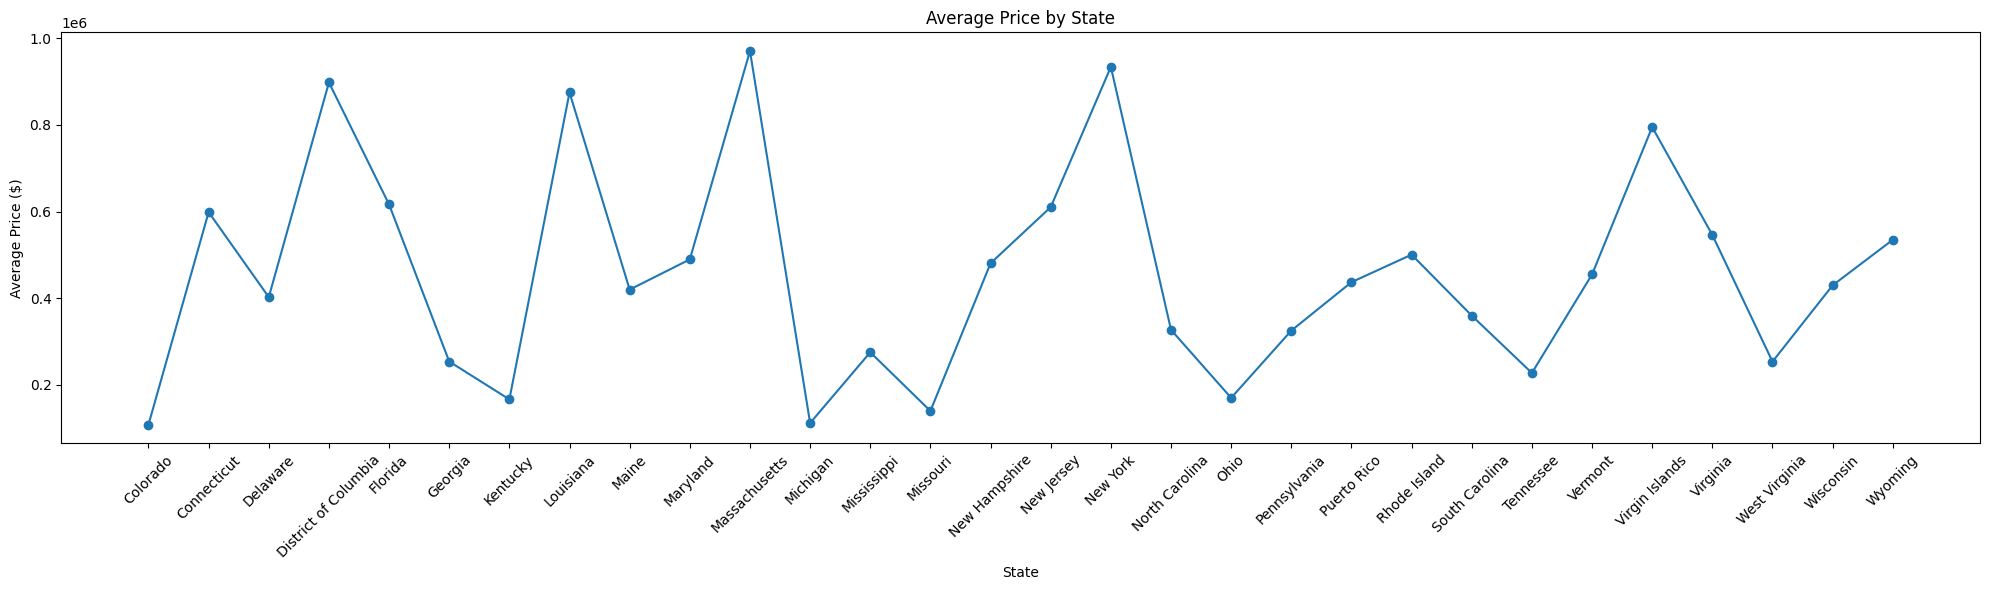

In [4]:
# Calculate average price by state
avg_price_by_state = dataFrame.groupby('state')['price'].mean().reset_index()
avg_price_by_state = avg_price_by_state[avg_price_by_state['state'] != 'California']

# Plot line plot
plt.figure(figsize=(20, 6))
plt.plot(avg_price_by_state['state'], avg_price_by_state['price'], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('State')
plt.ylabel('Average Price ($)')
plt.title('Average Price by State')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)


# Show plot
plt.tight_layout()
plt.show()

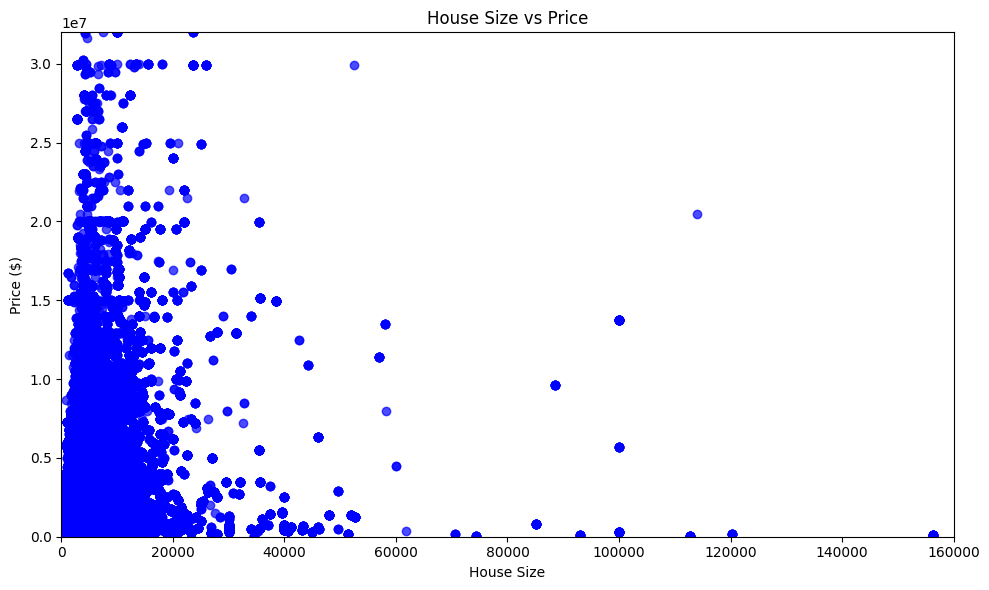

In [5]:
plt.figure(figsize=(10, 6))

plt.scatter(dataFrame['house_size'], dataFrame['price'], color='blue', alpha=0.7)

plt.xlim(0, 160000)
plt.ylim(0, 32000000)

plt.xlabel('House Size')
plt.ylabel('Price ($)')
plt.title('House Size vs Price')

plt.tight_layout()
plt.show()

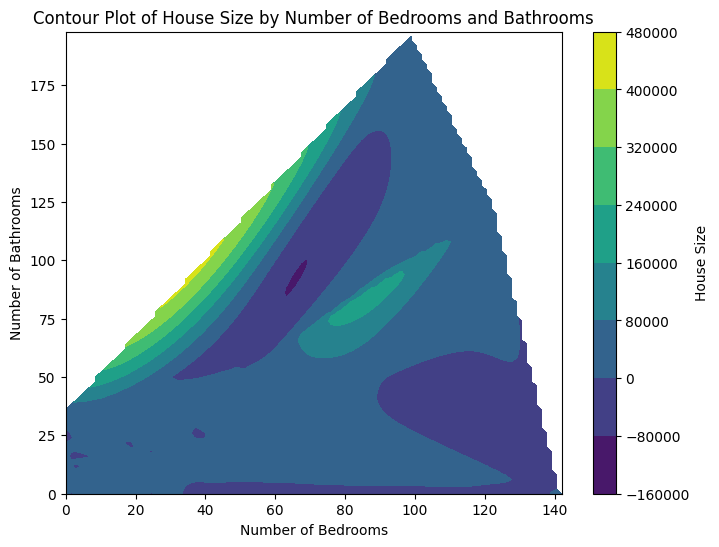

In [6]:
dataFrame_Copy = dataFrame.fillna(0)
# Extract the required columns
bed = dataFrame_Copy['bed']
bath = dataFrame_Copy['bath']
house_size = dataFrame_Copy['house_size']

# Define the grid over which we want to interpolate
grid_x, grid_y = np.mgrid[min(bed):max(bed):100j, min(bath):max(bath):100j]

# Interpolate over the grid
grid_z = griddata((bed, bath), house_size, (grid_x, grid_y), method='cubic')

# Create the contour plot
plt.figure(figsize=(8, 6))
plt.contourf(grid_x, grid_y, grid_z, cmap='viridis')

# Add color bar and labels
plt.colorbar(label='House Size')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Bathrooms')
plt.title('Contour Plot of House Size by Number of Bedrooms and Bathrooms')

# Show the plot
plt.show()

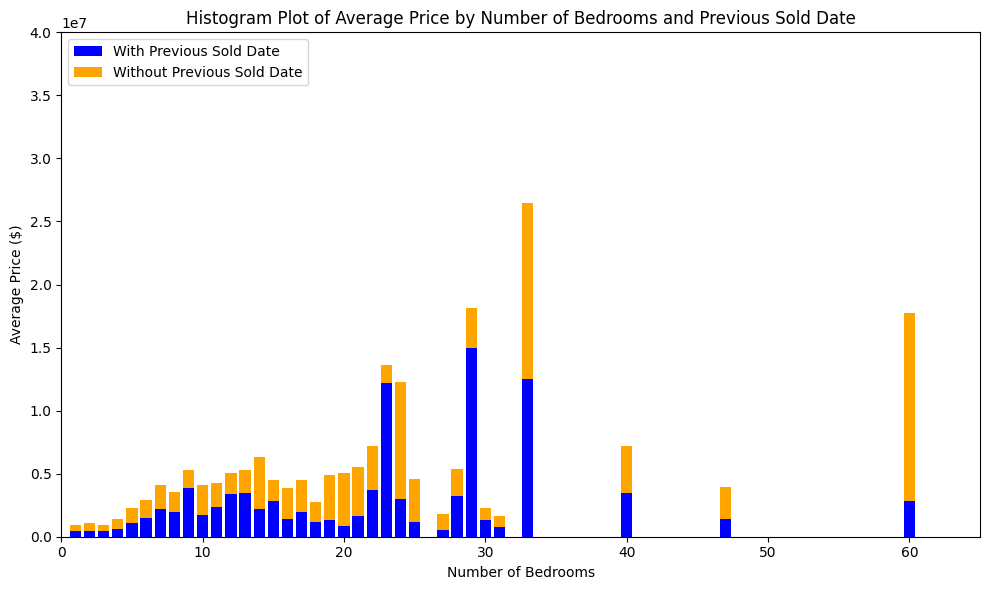

In [7]:
# Group the data by number of bedrooms and presence of previous sold date, then calculate average price
grouped = dataFrame.groupby(['bed', dataFrame['prev_sold_date'].isnull()])['price'].mean()

# Unstack the DataFrame to separate the presence and absence of previous sold date
grouped = grouped.unstack()

# Create histogram plot
plt.figure(figsize=(10, 6))

# Plot bars for houses with no previous sold date
plt.bar(grouped.index, grouped[False], color='blue', label='With Previous Sold Date')

# Plot bars for houses with previous sold date
plt.bar(grouped.index, grouped[True], color='orange', label='Without Previous Sold Date', bottom=grouped[False])

# Adding labels and title
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price ($)')
plt.title('Histogram Plot of Average Price by Number of Bedrooms and Previous Sold Date')
plt.legend()
plt.xlim(0, 65)
plt.ylim(0, 40000000)

# Show plot
plt.tight_layout()
plt.show()

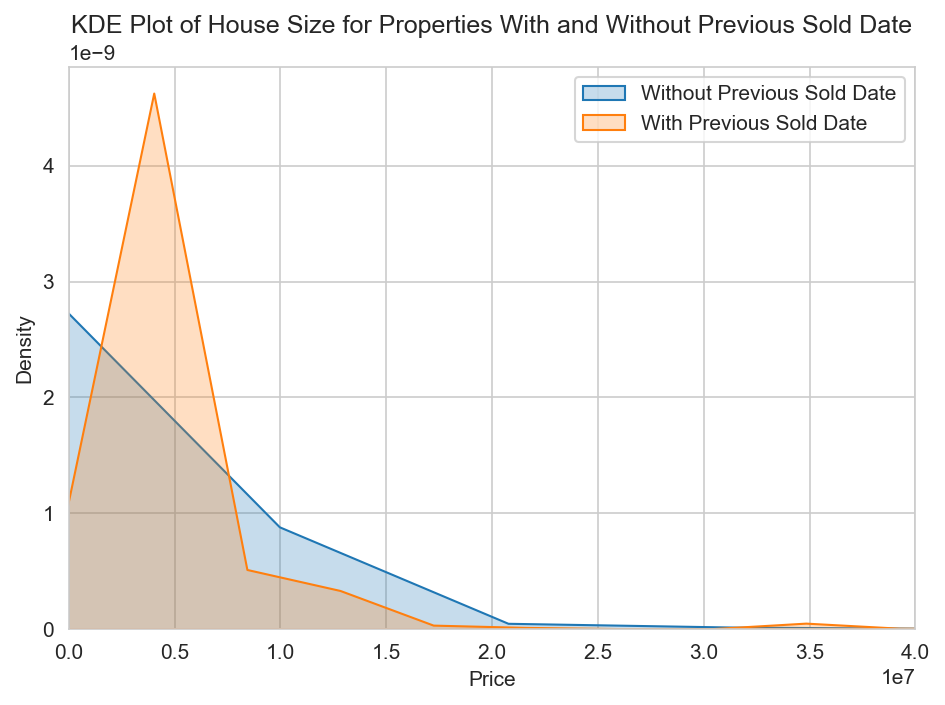

In [8]:
with sns.axes_style('whitegrid'):
    plt.figure(dpi=150)
    sns.kdeplot(dataFrame.loc[dataFrame['prev_sold_date'].isnull(), 'price'],
                fill=True, label='Without Previous Sold Date')
    sns.kdeplot(dataFrame.loc[~dataFrame['prev_sold_date'].isnull(), 'price'],
                fill=True, label='With Previous Sold Date')
    plt.legend()
    
    plt.xlim(0, 40000000)

    # Adding labels and title
    plt.xlabel('Price')
    plt.ylabel('Density')
    plt.title('KDE Plot of House Size for Properties With and Without Previous Sold Date')

    # Show plot
    plt.tight_layout()
    plt.show()

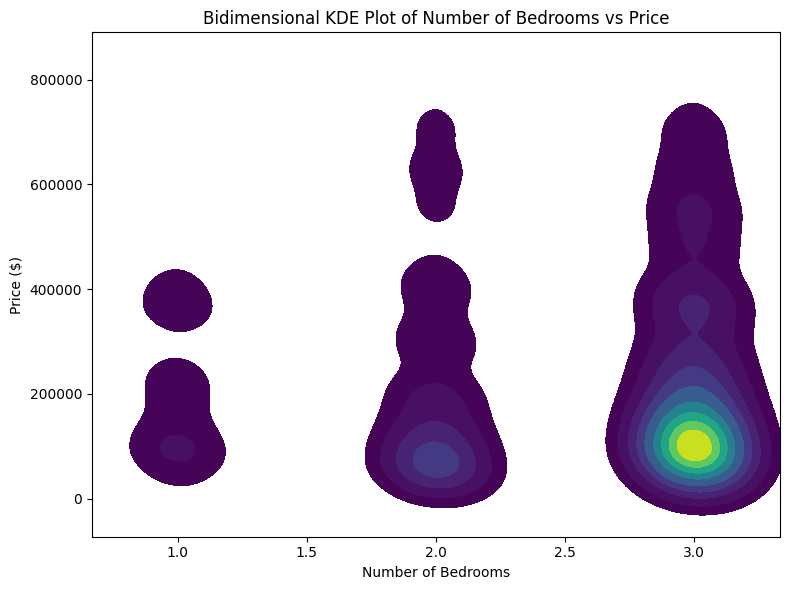

In [9]:
data_filtered = dataFrame[(dataFrame['bed'] <= 3) & (dataFrame['price'] <= 800000)].head(10000)

# Create bidimensional KDE plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data_filtered, x='bed', y='price', fill=True, cmap='viridis')

# Adding labels and title
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price ($)')
plt.title('Bidimensional KDE Plot of Number of Bedrooms vs Price')

# Show plot
plt.tight_layout()
plt.show()

C:\Users\Max\AppData\Local\Temp\ipykernel_3888\2631706747.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 800x600 with 0 Axes>

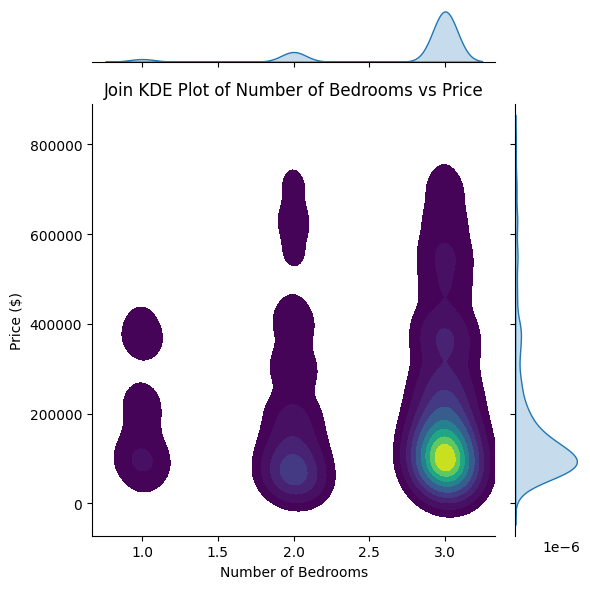

In [10]:
# Create bidimensional KDE plot
plt.figure(figsize=(8, 6))
sns.jointplot(data=data_filtered, x='bed', y='price', fill=True, cmap='viridis', kind='kde')

# Adding labels and title
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price ($)')
plt.title('Join KDE Plot of Number of Bedrooms vs Price')

plt.tight_layout()
plt.show()

C:\Users\Max\AppData\Local\Temp\ipykernel_3888\3135169926.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


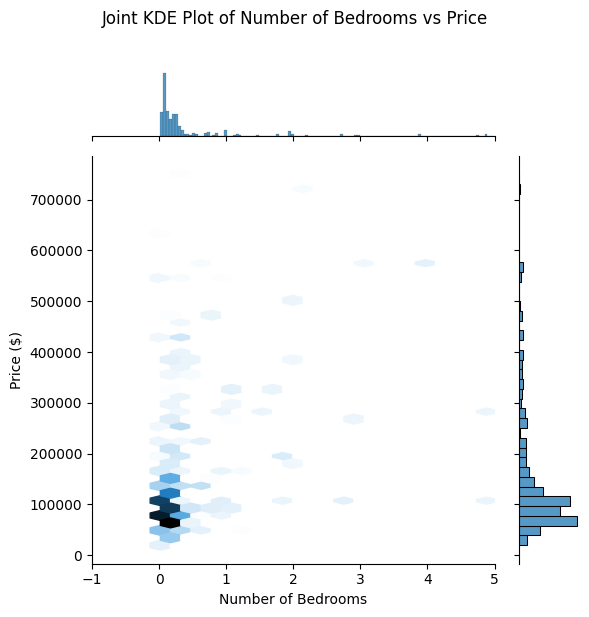

In [11]:
data_filtered = dataFrame[(dataFrame['bed'] <= 3) & (dataFrame['price'] <= 800000)].head(1000)
# Create joint plot with hexagonal binning
joint = sns.jointplot(data=data_filtered, x='acre_lot', y='price', kind='hex')

# Set labels and title
joint.set_axis_labels(xlabel='Number of Bedrooms', ylabel='Price ($)')
joint.fig.suptitle('Joint KDE Plot of Number of Bedrooms vs Price', y=1.02)

plt.xlim(-1, 5)

# Show plot
plt.tight_layout()
plt.show()

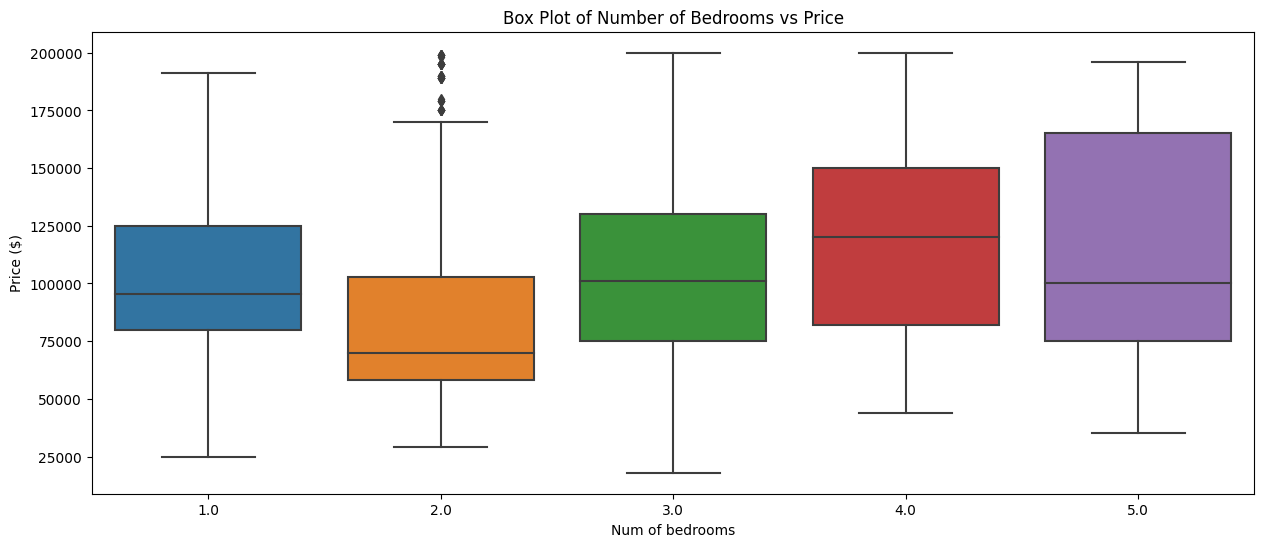

In [12]:
data_filtered = dataFrame[(dataFrame['bed'] <= 5) & (dataFrame['price'] <= 200000)].head(5000)
# Create box plot
plt.figure(figsize=(15, 6))
sns.boxplot(data=data_filtered, x='bed', y='price')

# Adding labels and title
plt.xlabel('Num of bedrooms')
plt.ylabel('Price ($)')
plt.title('Box Plot of Number of Bedrooms vs Price')

plt.show()

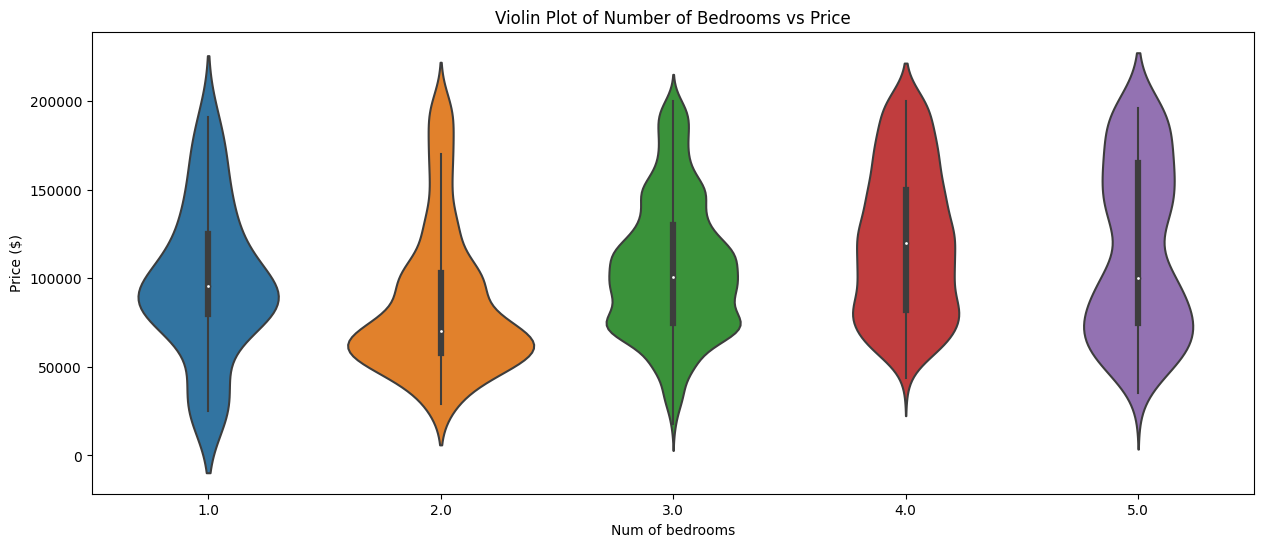

In [13]:
# Create violinplot plot
plt.figure(figsize=(15, 6))
sns.violinplot(data=data_filtered, x='bed', y='price')

# Adding labels and title
plt.xlabel('Num of bedrooms')
plt.ylabel('Price ($)')
plt.title('Violin Plot of Number of Bedrooms vs Price')

plt.show()

c:\Users\Max\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

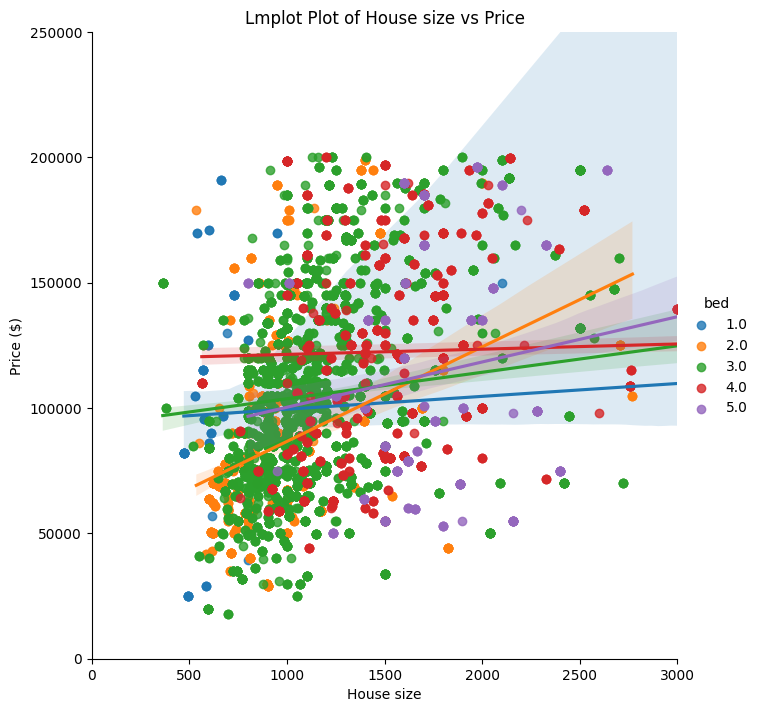

In [14]:
# Create lmplot plot
plt.figure(figsize=(10, 6))
sns.lmplot(data=data_filtered, x='house_size', y='price', hue='bed', height=7, aspect=1)

# Adding labels and title
plt.xlabel('House size')
plt.ylabel('Price ($)')
plt.xlim([0,3000])
plt.ylim([0,250000])
plt.title('Lmplot Plot of House size vs Price')

plt.show()

In [15]:
# Group the data by state and calculate the mean price
mean_price_by_state = dataFrame.groupby('state')['price'].mean().reset_index()

# Convert state names to state codes
state_to_code = us.states.mapping('name', 'abbr')
mean_price_by_state['state'] = mean_price_by_state['state'].map(state_to_code)

# Create a choropleth map for the United States
fig = go.Figure(data=go.Choropleth(
    locations=mean_price_by_state['state'],  # Spatial coordinates
    z=mean_price_by_state['price'].astype(float),  # Data to be color-coded
    locationmode='USA-states',  # Set to plot state-level choropleth
    colorscale='Blues',
    colorbar_title='Mean Price',
))

# Adjust the layout
fig.update_layout(
    title_text='Mean House Price in the United States',
    geo_scope='usa',  # Zoom to the USA
    width=800,  # Set the width to 800 pixels
    height=600,  # Set the height to 600 pixels
    margin=dict(l=0, r=0, t=50, b=0),  # Reduce whitespace around the map
)

# Show the map
fig.show()

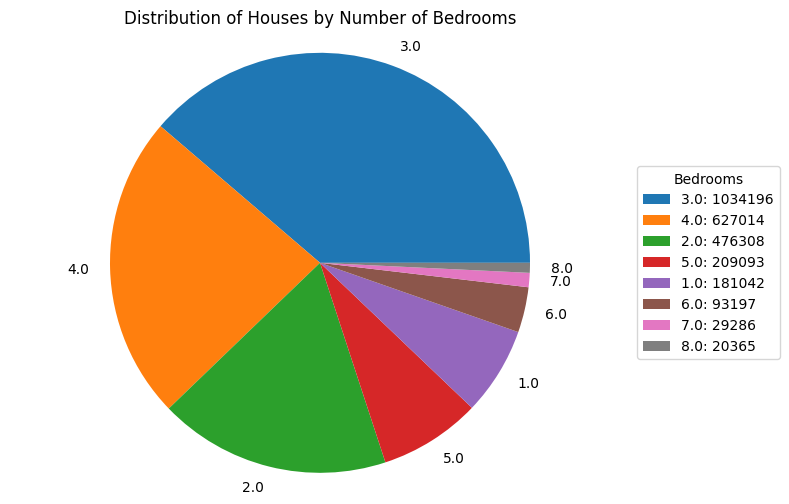

In [16]:
# Filter the dataFrame to only include houses with 8 bedrooms or less
filtered_dataFrame = dataFrame[dataFrame['bed'] <= 8]

# Count the number of houses for each number of bedrooms
bedroom_counts = filtered_dataFrame['bed'].value_counts()

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 6))
wedges, _ = ax.pie(bedroom_counts, labels=bedroom_counts.index)
ax.axis('equal')  # Ensure the pie chart is circular
ax.set_title('Distribution of Houses by Number of Bedrooms')

# Create a legend with the bedroom counts
legend_labels = ['{}: {}'.format(i, j) for i, j in zip(bedroom_counts.index, bedroom_counts)]
ax.legend(wedges, legend_labels, title="Bedrooms", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()